In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications.resnet50 import preprocess_input

from unsupcon_loss import get_aug_seq

170508288/170498071 [==============================] - 6s 0us/step
(100, 32, 32, 3)


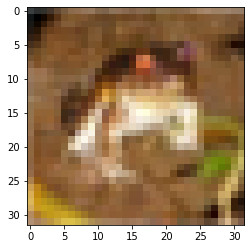

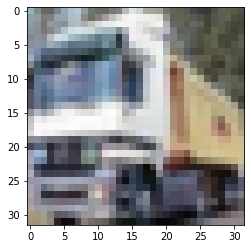

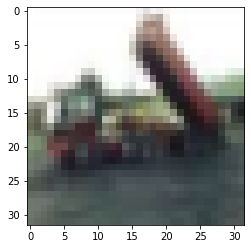

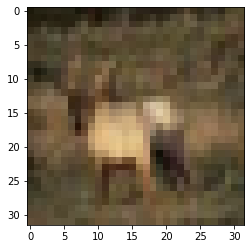

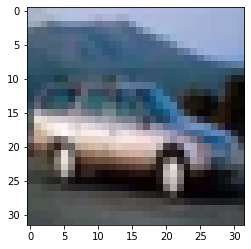

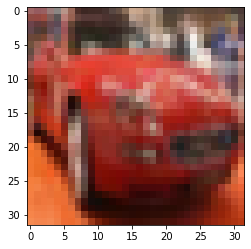

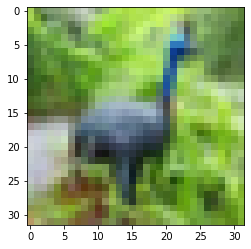

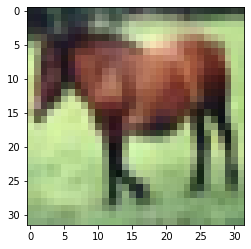

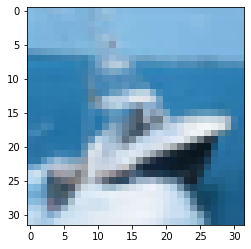

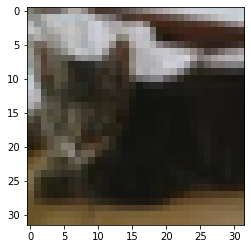

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X = X_train[:100]
print(np.shape(X))
X_batch = X[:10]
for i in range(np.size(X_batch, 0)):
    plt.figure()
    plt.imshow(X_batch[i])

In [3]:
print(X_batch[i])

[[[125 125 116]
  [110 101  91]
  [102  90  83]
  ...
  [202 207 214]
  [200 205 212]
  [202 208 214]]

 [[142 146 142]
  [146 144 139]
  [176 172 170]
  ...
  [195 201 205]
  [198 205 209]
  [204 211 215]]

 [[180 185 183]
  [143 146 146]
  [156 157 157]
  ...
  [122 111 113]
  [139 128 131]
  [158 147 150]]

 ...

 [[104  82  41]
  [101  80  39]
  [101  81  38]
  ...
  [126 103  67]
  [126 103  69]
  [125 101  68]]

 [[104  81  40]
  [105  84  41]
  [109  88  43]
  ...
  [138 113  78]
  [137 113  80]
  [137 112  81]]

 [[105  83  42]
  [108  87  45]
  [115  94  50]
  ...
  [143 117  82]
  [143 116  84]
  [144 116  86]]]


In [4]:
X = preprocess_input(X)
X = tf.math.multiply(1./255, X)

2021-12-08 20:49:51.578393: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 20:49:51.613164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 20:49:51.613387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 20:49:51.614399: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(100, 32, 32, 3)


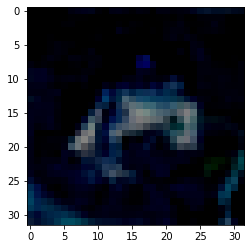

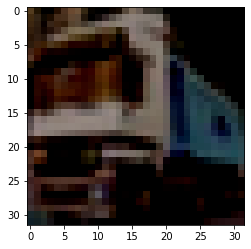

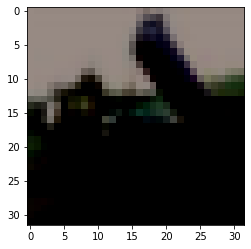

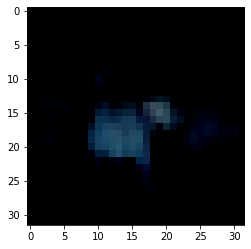

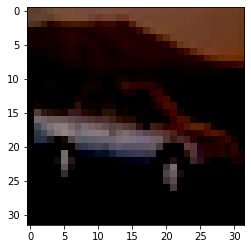

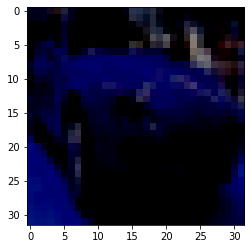

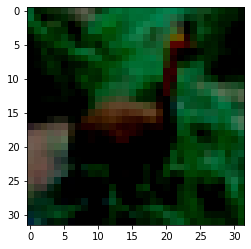

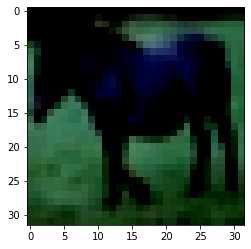

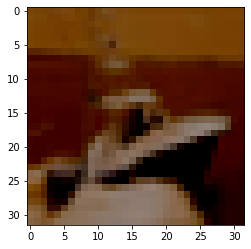

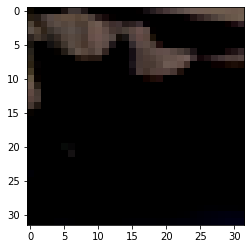

In [5]:
print(np.shape(X))
X_batch = X[:10]
for i in range(np.size(X_batch, 0)):
    plt.figure()
    plt.imshow(X_batch[i])

In [6]:
print(X_batch[i])

tf.Tensor(
[[[ 0.04729803  0.03223922  0.00517647]
  [-0.05074119 -0.06187843 -0.05364706]
  [-0.08211374 -0.10501569 -0.08501961]
  ...
  [ 0.43161178  0.35380787  0.30713728]
  [ 0.42376864  0.34596473  0.29929414]
  [ 0.43161178  0.35772943  0.30713728]]

 [[ 0.14925882  0.11459216  0.07184314]
  [ 0.13749412  0.10674903  0.08752941]
  [ 0.25906274  0.21655296  0.20517649]
  ...
  [ 0.39631766  0.33027846  0.2796863 ]
  [ 0.41200393  0.34596473  0.291451  ]
  [ 0.43553334  0.36949414  0.31498042]]

 [[ 0.31004316  0.26753336  0.22086276]
  [ 0.1649451   0.11459216  0.07576471]
  [ 0.20808235  0.15772942  0.1267451 ]
  ...
  [ 0.03553332 -0.02266274 -0.00658824]
  [ 0.10612156  0.04400393  0.06007843]
  [ 0.18063137  0.11851373  0.13458824]]

 ...

 [[-0.24681963 -0.13638824 -0.07717647]
  [-0.25466278 -0.14423138 -0.08894118]
  [-0.25858435 -0.14030981 -0.08894118]
  ...
  [-0.14485884 -0.05403529  0.00909804]
  [-0.1370157  -0.05403529  0.00909804]
  [-0.14093727 -0.06187843  0.005

In [7]:
aug_seq = get_aug_seq(np.size(X_batch, 1), np.size(X_batch, 2))
X_batch_aug = aug_seq(X_batch)

(10, 224, 224, 3)


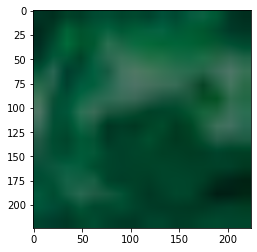

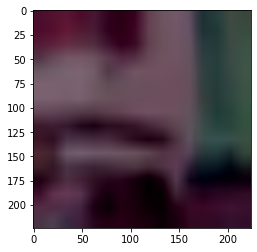

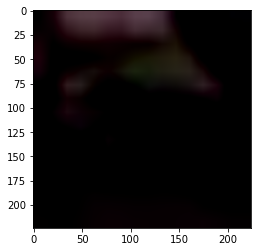

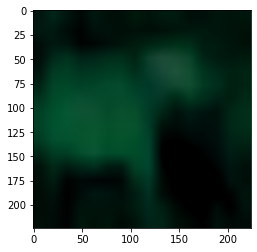

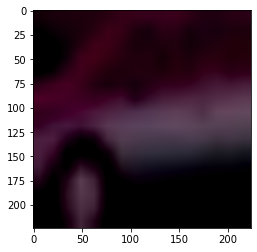

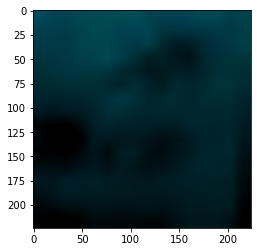

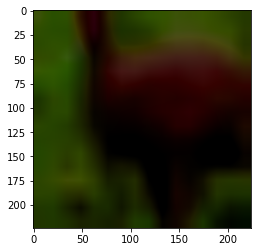

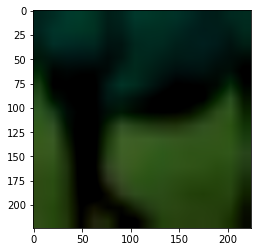

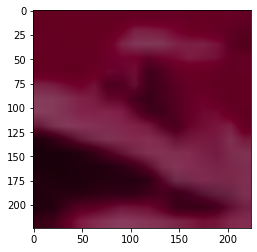

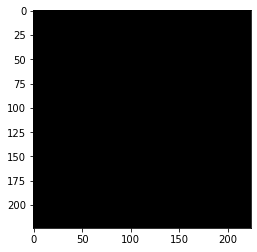

In [8]:
print(np.shape(X_batch_aug))
for i in range(np.size(X_batch_aug, 0)):
    plt.figure()
    plt.imshow(X_batch_aug[i])

In [9]:
print(X_batch_aug[i])

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32)


In [10]:
X = X_train[:100]
X = tf.math.multiply(1./255, X)
X = aug_seq(X)

(100, 224, 224, 3)


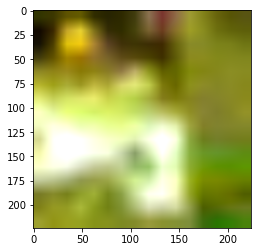

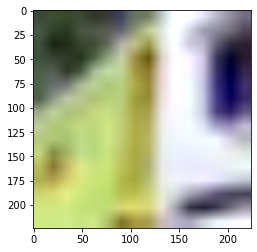

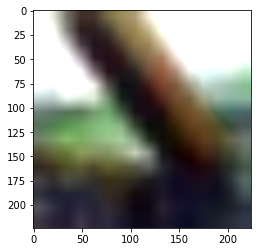

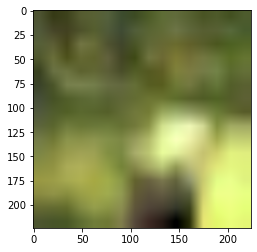

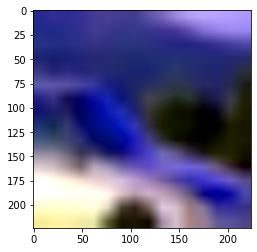

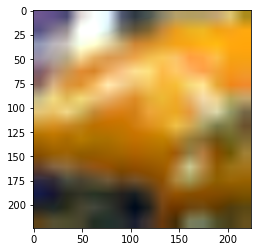

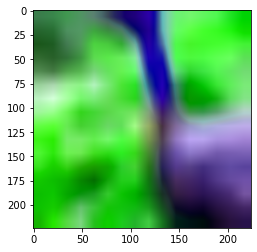

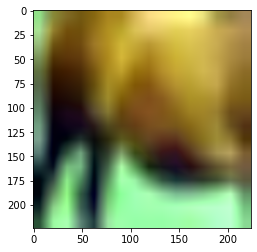

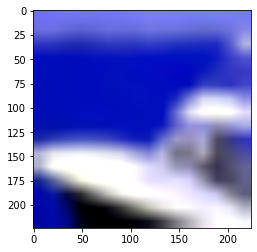

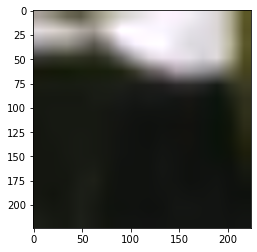

In [11]:
print(np.shape(X))
X_batch = X[:10]
for i in range(np.size(X_batch, 0)):
    plt.figure()
    plt.imshow(X_batch[i])

In [12]:
print(X_batch_aug[i])

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32)
